In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [189]:
# Model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Saving and loading model
import pickle

In [190]:
anemia = pd.read_csv("anemia.csv")

In [191]:
anemia.head(10)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
5,0,11.6,22.3,30.9,74.5,1
6,1,12.7,19.5,28.9,82.9,1
7,1,12.7,28.5,28.2,92.3,1
8,0,14.1,29.7,30.5,75.2,0
9,1,14.9,25.8,31.3,82.9,0


In [192]:
anemia.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

In [193]:
len(anemia)

1421

In [194]:
anemia.shape

(1421, 6)

In [195]:
anemia.isna().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [196]:
anemia.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


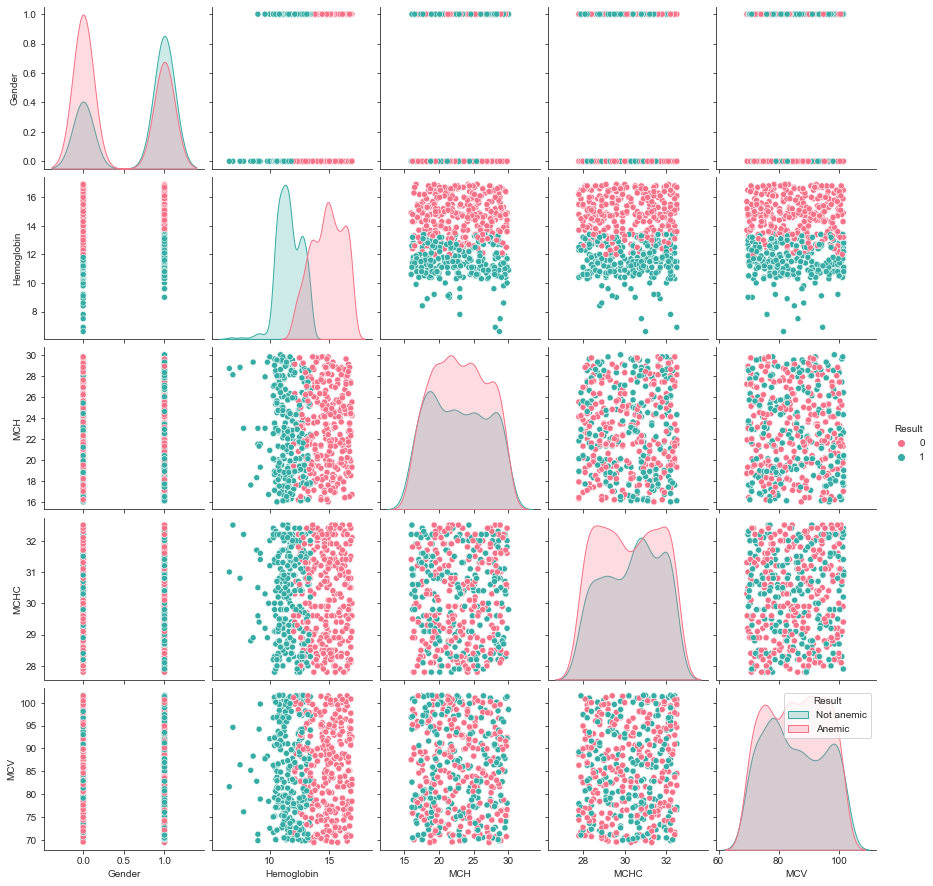

In [197]:
#Visualizing data
sns.set_style("ticks")
sns.pairplot(anemia,hue = 'Result',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.legend(title='Result', loc='upper right', labels=['Not anemic', 'Anemic']);
plt.show()

In [198]:
#splitting data into x and y
x = anemia.drop("Result", axis=1)
y = anemia["Result"]

In [199]:
x.head()

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5


In [200]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Result, dtype: int64

In [201]:
#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [202]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1136, 5), (285, 5), (1136,), (285,))

In [203]:
#using RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [204]:
model.score(x_train, y_train)

1.0

In [205]:
model.score(x_test, y_test)

1.0

In [206]:
y_preds = model.predict(x_test)
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [207]:
#Evaluting model using cross_val_score
cross_val_score = cross_val_score(model, x, y)

In [208]:
print(f"Anemia Classification Cross-Validated Accuracy:{np.mean(cross_val_score) *100:.2f}%")

Anemia Classification Cross-Validated Accuracy:100.00%


In [209]:
#Evaluting model using confusion matrix
confusion_matrix (y_test, y_preds)

array([[160,   0],
       [  0, 125]], dtype=int64)

In [210]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,160,0
1,0,125


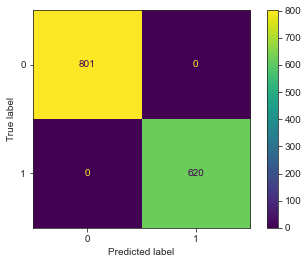

In [211]:
plot_confusion_matrix(model, x, y);

In [212]:
#Evaluating with ROC/AUC Curve
y_probs = model.predict_proba(x_test)

y_probs[:10]

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.03, 0.97],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ]])

In [213]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([1.  , 1.  , 0.  , 1.  , 0.  , 0.97, 0.  , 0.  , 0.01, 1.  ])

In [214]:
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

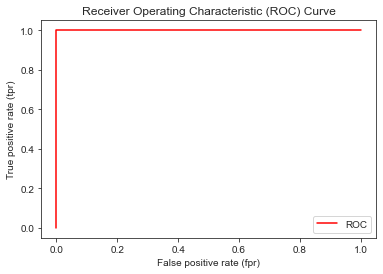

In [215]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false postive rate(fpr) 
    and true positive rate (tpr) of model.
    """
    
    plt.plot(fpr, tpr, color="red", label="ROC")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [216]:
roc_auc_score(y_test, y_probs_positive)

1.0

In [217]:
# Classification report of Model
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       125

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



In [218]:
#Saving Model
pickle.dump(model, open("anemia_random_forest_model.pkl", "wb"))